In [9]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Load the data
data_path = "../data/raw/energy_data.csv"  # Update the path if needed
df = pd.read_csv(data_path)

In [4]:
df.head()

,period,respondent,respondent-name,type,type-name,value,value-units
0,2024-12-24T08,AVA,Avista Corporation,DF,Day-ahead demand forecast,1416,megawatthours
1,2024-12-24T08,BANC,Balancing Authority of Northern California,DF,Day-ahead demand forecast,1672,megawatthours
2,2024-12-24T08,BPAT,Bonneville Power Administration,DF,Day-ahead demand forecast,6407,megawatthours
3,2024-12-24T08,CAL,California,DF,Day-ahead demand forecast,27276,megawatthours
4,2024-12-24T08,CHPD,Public Utility District No. 1 of Chelan County,DF,Day-ahead demand forecast,265,megawatthours


In [5]:
# Display basic info
print("Data Overview:")
print(df.info())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   period           5000 non-null   object
 1   respondent       5000 non-null   object
 2   respondent-name  5000 non-null   object
 3   type             5000 non-null   object
 4   type-name        5000 non-null   object
 5   value            5000 non-null   int64 
 6   value-units      5000 non-null   object
dtypes: int64(1), object(6)
memory usage: 273.6+ KB
None


In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
period             0
respondent         0
respondent-name    0
type               0
type-name          0
value              0
value-units        0
dtype: int64


In [7]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               value
count    5000.000000
mean    18195.781800
std     53148.553951
min     -8615.000000
25%       810.750000
50%      3114.500000
75%     17996.500000
max    495757.000000


### Distribution of value

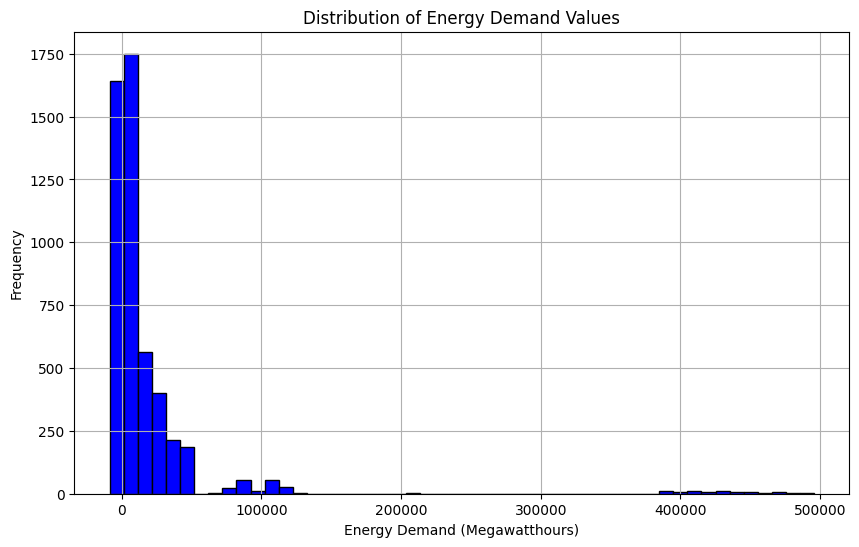

In [10]:
# Histogram of energy demand values
plt.figure(figsize=(10, 6))
plt.hist(df['value'], bins=50, color='blue', edgecolor='black')
plt.title("Distribution of Energy Demand Values")
plt.xlabel("Energy Demand (Megawatthours)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

Energy Demand Distribution:

Most energy demand values are small (below 50,000 MWh).

Some values are extremely high (up to 500,000 MWh), which could be errors or rare events.

What this means: We might need to handle these extreme values because they can affect how our model learns.

### Time Trends

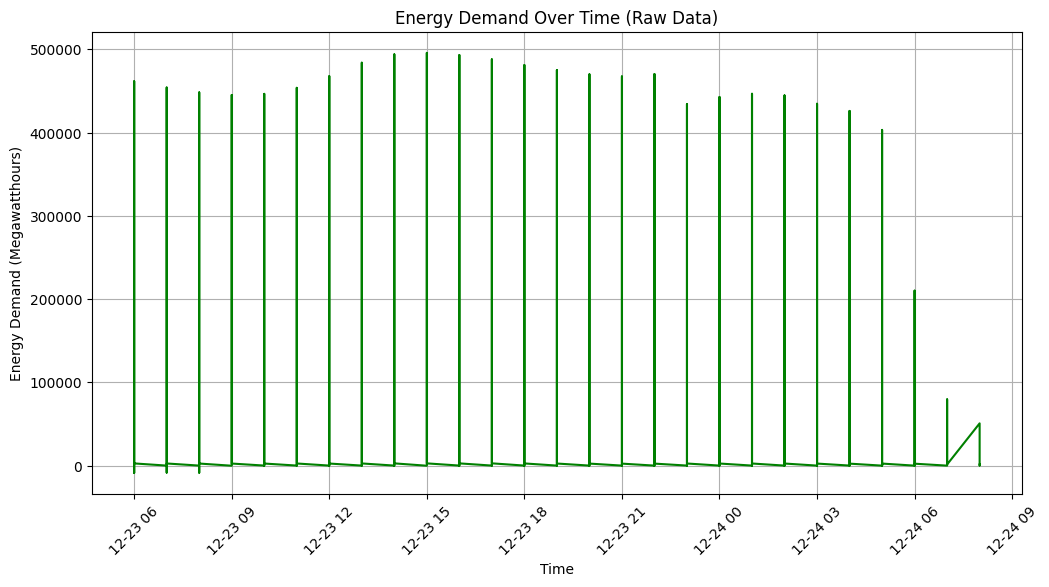

In [11]:
# Convert 'period' to datetime for analysis
df['period'] = pd.to_datetime(df['period'])

# Plot energy demand over time
plt.figure(figsize=(12, 6))
plt.plot(df['period'], df['value'], color='green')
plt.title("Energy Demand Over Time (Raw Data)")
plt.xlabel("Time")
plt.ylabel("Energy Demand (Megawatthours)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Energy Demand Over Time:

The data shows regular spikes, indicating a pattern in energy demand (e.g., high demand at specific times of the day or week).

What this means: We can use these patterns to create features like hour or day to improve our forecasting.

### Aggregate By Day

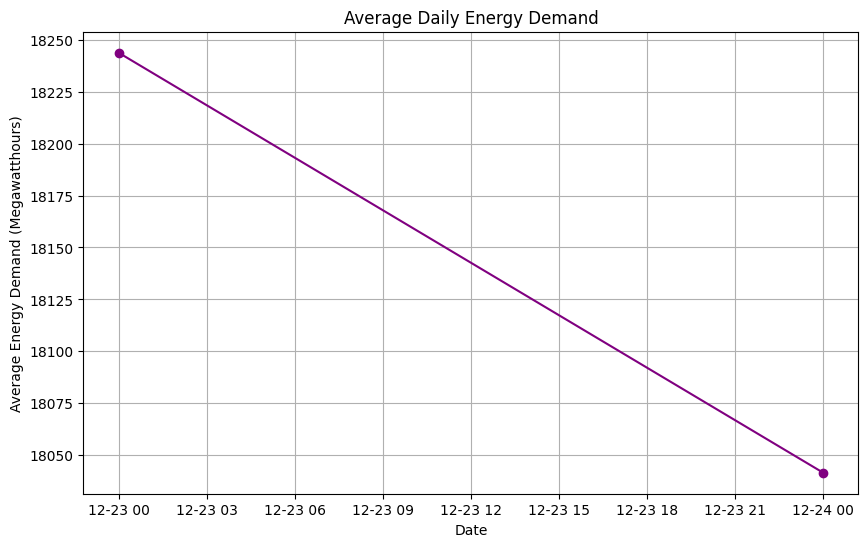

In [12]:
# Aggregate by day
df['day'] = df['period'].dt.date
daily_demand = df.groupby('day')['value'].mean()

# Plot daily averages
plt.figure(figsize=(10, 6))
daily_demand.plot(kind='line', marker='o', color='purple')
plt.title("Average Daily Energy Demand")
plt.xlabel("Date")
plt.ylabel("Average Energy Demand (Megawatthours)")
plt.grid()
plt.show()

Average Daily Energy Demand:

The daily averages seem to decline over time, which might be because some days have incomplete data.

What this means: We need to ensure that the dataset is complete for meaningful analysis.

### Respondent-Specfic Trends

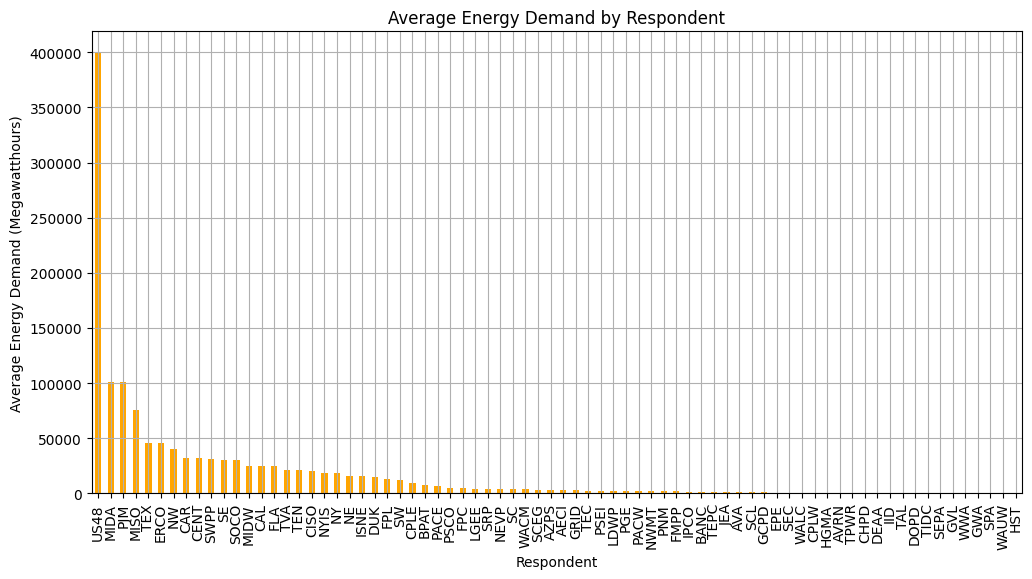

In [13]:
# Group by respondent
respondent_avg = df.groupby('respondent')['value'].mean().sort_values(ascending=False)

# Bar plot of average demand by respondent
plt.figure(figsize=(12, 6))
respondent_avg.plot(kind='bar', color='orange')
plt.title("Average Energy Demand by Respondent")
plt.xlabel("Respondent")
plt.ylabel("Average Energy Demand (Megawatthours)")
plt.grid()
plt.show()

Energy Demand by Respondent:

Some energy authorities (like US48 or MISO) have much higher demand than others.

What this means: If we’re interested in region-specific predictions, we could use respondent as a feature. Otherwise, we might drop it.